# Lab 1: NumPy

This lab covers some useful operations of NumPy. NumPy is a library that supports large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays. This lab focuses on introducing different operations, so we will not use a real world dataset in the first session. NumPy is available in the data science package distribution such as Anaconda or pip repository. Here are some advantages of NumPy compared to a default Python list introduced in our coursebook:

- Less menory usage
- Faster operation speed
- Vectorized/Broadcasted operation when calculating multiple values together
- Convenient methods to change matrix structure

In [1]:
import numpy as np

### 1. Simple experiment: Speed comparison

**Creating a NumPy array**: Most common way of creating a NumPy array is to convert a normal Python list created by putting numbers manually or using list comprehension.

In [2]:
# list_1, array_1: create a list [1, 2, 3, 4, 5, 6] and change it to NumPy array
list_1 = None

In [3]:
array_1 = None

In [6]:
# Unlike a normal Python list, NumPy array only can have one type (dtype)


In [ ]:
# One float number will change the whole dtype to float
# Try to change one number in list_1 to float (e.g., 2 -> 2.0) and check dtype


In [ ]:
# list_2, array_2: create a numpy array using list comprehension from 6 to 11
list_2 = None
array_2 = None

In [ ]:
array_2

**Speed comparison**: NumPy is written in C inside so it is in general faster than normal Python list in its array operations.

In [ ]:
# list_3, array_3: Create one normal list and one NumPy array of size 10,000 using list comprehension.
list_3 = None
array_3 = None

In [ ]:
# Use timeit for list calculation. Multiply any number and add any number using list comprehension.
%timeit

In [ ]:
# Timeit for NumPy array calculation. Do the same action but use NumPy's vector operations.
%timeit 

However, a NumPy array is slower than a normal Python list for structural changes.

In [ ]:
# Timeit for the append operation of a normal Python list - append 1 to the list
%timeit 

In [ ]:
# Timeit for the append operation of a NumPy array - append 1 to the array
%timeit 

### 2. Creating a numpy array

**Creating a NumPy array**: If you already have data in normal Python list format, you can convert it to a NumPy array by calling `np.array`.



In [ ]:
# We are creating the same arrays
list_1 = [1.0,2,3,4,5,6]
array_1 = np.array(list_1)

list_2 = [x for x in range(6,12)]
array_2 = np.array(list_2)

**Only a single type**: A NumPy array usually has only one type, and float always precedes int.

In [ ]:
 # Check dtype of array_1


You can change the type of numpy array if it is compatible.

In [ ]:
# Use astype to change the type of array_1 from float to int


However, it is not recommended to have a string numpy array (but it's still possible!).

In [ ]:
# Use astype to change the type of array_1 from float to string


In [ ]:
# It is also possible to change the type of a string NumPy array to float if all elements are recognizable.
# Apply astype twice to change the dtype to string, and again to float

**Initialization:** You can also create new NumPy arrays with different initialization strategies.

In [ ]:
# np.zeros((dims...))


In [ ]:
# np.ones


In [ ]:
# np.eye = np.identity


In [ ]:
# np.diag receives a list of size n and creates an n*n diagonal matrix


In [ ]:
# np.full((dims...), value) receives both size and one value to fill in


It is also possible to create a NumPy array of more than two dimensions.

In [ ]:
# np.full with three dimensions


**Empty array**: It is not recommended to create an 'empty' array.

In [ ]:
# np.empty((dims...))


You can use it when you make sure that you will initialize all values since it can create an array at a marginally faster speed compared to other initialization methods.

In [ ]:
# Timeit np.empty([100, 100])
%timeit

In [ ]:
# Timeit np.zeros -> You don't need it if you won't use zeros and will initialize all values.
%timeit

Note that it does not follow any distribution (= trash values) so you cannot use the values as random values.

### 3. Selection and modification

We might need to change part of NumPy array's values or entire values by applying vectorized operations. Then we need to correctly choose the values we want by using correct selection methods.

In [ ]:
# list_4, array_4: Create a 2*3 matrix with any numbers
list_4 = None
array_4 = None

**Python style indexing**: Python list style indexing works as well for NumPy arrays: one number in one bracket.

In [ ]:
# Get the third value in the second row (6) by using Python style indexing from array_4.


**NumPy style indexing:** In NumPy arrays, you can choose any element in the array with only one pair of square brackets.

In [ ]:
# Get the third value in the second row (6) by using NumPy style indexing from array_4.
# NumPy style is a lot easier to use by removung multiple square brackets


**Every dimension is independent**: NumPy does not have a row / column concept but has axes since one can have more than two dimensions. You can treat each axis equally and choose one element of one axis directly.

In [ ]:
# Python List: Third elements of each row in a normal python array list_4 (or each element of the list) - list comphrehension


You do not need to create a list comprehension for column-wise operation.

In [ ]:
# NumPy array: Third elements of the second axis - much simpler!
# : means we choose all elements of a specific dimension


You can also change the number of dimensions. 

**Flattening**: Use .flatten() or np.ravel() functions to make the array have only one dimension. [Differences between flatten and ravel functions](https://stackoverflow.com/questions/28930465/what-is-the-difference-between-flatten-and-ravel-functions-in-numpy)

In [ ]:
# Reprint array_4


In [ ]:
# ndarray.flatten: it will leave only one dimension


In [ ]:
# np.ravel


**Reshaping**: np.reshape will receive any tuple if the number of total elements are the same.

In [ ]:
# Use np.reshape to change the shape of array_4 from (2,3) to (3,2)


**Adding an axis**: putting `None` or `np.newaxis` will create an axis.

In [ ]:
# newaxis


You should be careful when you select a subset - it is not a copy but just a pointer.

In [ ]:
# array_5: Create 5*5 diagonal matrix using np.diag
array_5 = None

In [ ]:
# Choose any subset of it (e.g., first and second elements of each axis)
array_5_sub = None

In [ ]:
# Change the value of one element


In [ ]:
# Check the subset and the original matrix and see if one value changed in both places


### 4. Broadcasting and aggregation

#### Broadcasting

Operation with variables of lower dimension can be broadcasted [if there is at least one matching dimension in terms of size]. There are two rules as follows:

- When the dimension is different, we always pad ones on the left side and check.
- Dimensions with size 'one' can be broadcasted to the higher number in the same dimension.

In [ ]:
# Recall array_2 ([6, 7, 8, 9, 10, 11])


In [ ]:
# Easiest broadcast is when we try to multiply scalar.
# As scalar does not have any dimension, it will be applied to every single element in the list.
# array_6: Try multiplying array_2 by 5
array_6 = None


In [ ]:
# Recall array_2 again


In [ ]:
# array_7: Create a 2*6 NumPy array with np.ones
array_7 = None

In [ ]:
# Vector broadcasting: Try adding array_2 to array_7 and check the values.


In [ ]:
# Check the shape of array_2 and array_7 and think how the rule can be applied
# (6,) -> (1, 6) -> (2, 6)


In [ ]:
# array_8 - Create a 6*2 NumPy array with np.ones
array_8 = None

In [ ]:
# Try to add array_8 to array_7 6*2 + 2*6? -> error
# NOT Broadcasted since 1 (new axis) can only be padded on the left size


That is not only for addition! It is for every operation if it can be defined between the elements.

In [ ]:
# Addition
array_7 + array_2 

In [ ]:
# Comparison
array_7 > array_2 

In [ ]:
array_7 >= array_2 

In [ ]:
# Equality
array_7 == array_2 

#### Aggregation

In [ ]:
# array - create a 4*5 NumPy array with the elements from 1 to 20
array_9 = np.array([i for i in range(1, 21)]).reshape([4, 5])

In [ ]:
array_9

In [ ]:
# Summation (ndarray.sum) - only one value will be created!


In [ ]:
# Axis-wise summation
# 'axis=0' means we want to change axis 0


In [ ]:
# sum with axis=1

In [ ]:
# max
array_9.max()

In [ ]:
# min
array_9.min()

In [ ]:
# argmax/argmin returns the index "after flatten"
array_9.argmax() # which one is index 19 in a 4*5 matrix?

In [ ]:
array_9.argmin() #?

In [ ]:
# unravel_index: Restore the index using np.unravel_index function
np.unravel_index(array_9.argmax(), array_9.shape)

In [ ]:
# standard deviation, product, cummulative sum
array_9.std()

In [ ]:
array_9.prod()

In [ ]:
array_9.cumsum()

### 5. Linear algebra methods

#### Dot product

NumPy automatically detects vector - you do not need to transpose vectors when you, for example, dot product two vectors.

In [ ]:
# Recall array_1, array_2
array_1, array_2

(array([1, 2, 3, 4, 5, 6]), array([ 6,  7,  8,  9, 10, 11]))

In [ ]:
# @ - matrix multiplication operator


In [ ]:
# .dot


Matmul and dot product returns the same result when we compute vectors. However, those two functions behave differently when the dimension is >= 3. For details, check [this page](https://www.delftstack.com/howto/numpy/numpy-dot-vs-matmul/).

In [ ]:
 # Matmul can recognize vectors as well

#### Matrix multiplication

In [ ]:
# Recall array_7, array_8 (2*6 and 6*2 arrays)
array_7.shape, array_8.shape

((2, 6), (6, 2))

In [ ]:
# The easiest way is to use @


In [ ]:
# Dot product can be used when you want to sum product 2D matrix multiplications.


In [ ]:
# Matrix structure is not automatically fixed unlike vectors

For matrices of >2D, matmul and dot functions act differently ([matmul vs dot](https://www.delftstack.com/howto/numpy/numpy-dot-vs-matmul/)).

In [ ]:
a = np.arange(2 * 2 * 4).reshape((2, 2, 4))
b = np.arange(2 * 2 * 4).reshape((2, 4, 2))
print(a)
print(b)

Matmul recognizes last two axes as matrices and performs two matrix multiplication (2\*4 and 4\*2) individually.

However, dot function performs the operation four times, making "sum product" of two 2\*4 matrices and two 4\*2 matrices, creating the resulting matrix of size (2, 2, 2, 2).

### 6. Random (updated)

NumPy has various methods to create random numbers following a specific probability distribution. From NumPy 1.17, it supports a random generator and recommends to use it, while the older way is still much more popular.

**Random number generation**: It is mainly used to generate random numbers following a specific distribution such as normal, uniform, or gamma.

In [ ]:
# np.random.default_rng - a new way of creating random states
rng = np.random.default_rng(12345)

In [ ]:
# rng.random: generate a random floating point number from [0, 1)


In [ ]:
# rng.uniform: generate random uniform numbers. Without low and high, it is the same as rng.random().


In [ ]:
# Remove current random seed


In [ ]:
# if you want to manage many different random seeds, you can create many random number generators.
rng1 = np.random.default_rng(12345)
print(rng1.random())
rng2 = np.random.default_rng(12346)
print(rng2.random())

In [ ]:
# rng.standard_normal: Standard normal distribution (mean = 0, std = 1)


In [ ]:
# Normal (mean, std, size)


In [ ]:
# rng.integers: Integers (start, end, size)


**Permutation and shuffling**: This can also be used to create an permuted array or a shuffled array.

In [ ]:
# random permutation


Note that shuffle function directly changes the input without copying it.

### Task 1: Data observation

Here we will try to solve a simple regression problem using only NumPy. So far, we have learnt various NumPy methods without any datasets. In this task, we will observe [the California housing](https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html) dataset and practice NumPy operations we have learned in the first session.

Task 1-1: Create a function to return the summary information (count, mean, std, min, max) of each attribute.

In [ ]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=True)

In [ ]:
X = california_housing.data
y = california_housing.target

In [ ]:
X

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [ ]:
y

0        4.526
1        3.585
2        3.521
3        3.413
4        3.422
         ...  
20635    0.781
20636    0.771
20637    0.923
20638    0.847
20639    0.894
Name: MedHouseVal, Length: 20640, dtype: float64

Here we have a simple plotting function to see the relationship between median income and median house value.

([], <a list of 0 Text major ticklabel objects>)

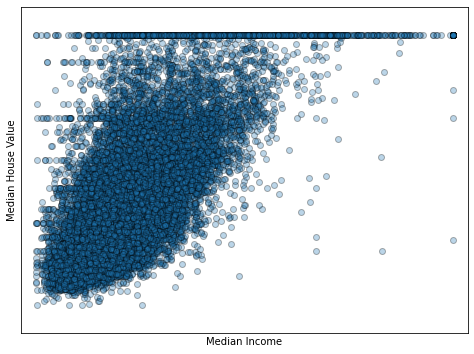

In [ ]:
import matplotlib.pyplot as plt

x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = y.min() - 0.5, y.max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

plt.xlabel("Median Income")
plt.ylabel("Median House Value")

# Plot the training points
plt.scatter(X.iloc[:, 0], y, edgecolor="k", alpha=0.3)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

The start point is to check the basic statistics of the dataset. Scikit-learn has its own describe function that shows simple properties of the dataset.

In [ ]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


This function can be easily developed with NumPy as well. This is your first task, which requires you to make the same describe function that returns the same properties. You can skip the quantiles (25%, 50%, 75%) but if you would like to, you can look into [np.quantile](https://numpy.org/doc/stable/reference/generated/numpy.quantile.html).

In [ ]:
def describe(data):
  """
  Input: Pandas DataFrame
  Output: Pandas DataFrame with the same summarization statistics with DataFrame.describe()

  Use various aggregation methods such as np.mean, np.min, np.max with axis setting to calculate the summary values.
  If you want to add quantiles, you can look into np.quantile in the official API document.
  """

  return None

Your describe function should be able to return the same values as the scikit-learn one does, however the returned values do not need to be in a form of DataFrame.

In [ ]:
describe(X)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899776,12.585253,2.474113,0.473899,1132.434688,10.385798,2.135901,2.003483
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


Task 1-2: Some machine learning algorithms such as linear regression requires us to standardize the dataset. Those functions also can be easily implemented with NumPy aggregation and broadcasting. This task requires you to create a function to standardize and normalize the function using the aggregation methods introduced in this lab.

There is no clear definition of each term. Each uses their own definition. Sometimes we use different terms to say the same thing. However, here in this lab we will define each term as follows:

- **Standardization**: Make features have the same standard deviaton and mean.

- **Normalization**: Make the range of value normalized into [0, 1].

To perform both standardization and normalization, you may need to use NumPy aggregation functions and broadcasting property.

In [ ]:
def standardize(data):
  """
  Input: Pandas DataFrame
  Output: Pandas DataFrame with mean == 0 and std == 1

  Check if your result has the standardized mean and standard deviation using describe() method you made above.
  """
  
  return None

In [ ]:
describe(standardize(X))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04,2.064000e+04
mean,-2.522018e-14,5.878911e-16,4.640911e-15,5.519526e-15,-7.506747e-17,-7.361326e-16,-8.068474e-14,-1.426325e-12
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.774299e+00,-2.196180e+00,-1.852319e+00,-1.610768e+00,-1.256123e+00,-2.290000e-01,-1.447568e+00,-2.385992e+00
25%,-6.881186e-01,-8.453931e-01,-3.994496e-01,-1.911716e-01,-5.638089e-01,-6.171062e-02,-7.967887e-01,-1.113209e+00
50%,-1.767951e-01,2.864572e-02,-8.078489e-02,-1.010650e-01,-2.291318e-01,-2.431585e-02,-6.422871e-01,5.389137e-01
75%,4.593063e-01,6.643103e-01,2.519615e-01,6.015869e-03,2.644949e-01,2.037453e-02,9.729566e-01,7.784964e-01
max,5.858286e+00,1.856182e+00,5.516324e+01,6.957171e+01,3.025033e+01,1.194191e+02,2.958068e+00,2.625280e+00


In [ ]:
def normalize(data):
    """"
    Input: Pandas DataFrame
    Output: Pandas DataFrame with min == 0 and max == 1

    Check if your result has the normalized min and max values using describe() method you made above.
    """

    return None

In [ ]:
describe(normalize(X))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,0.232464,0.541951,0.032488,0.022629,0.039869,0.001914,0.328572,0.476125
std,0.131017,0.246770,0.017539,0.014048,0.031740,0.008358,0.226982,0.199550
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142308,0.333333,0.025482,0.019943,0.021974,0.001398,0.147715,0.253984
50%,0.209301,0.549020,0.031071,0.021209,0.032596,0.001711,0.182784,0.583665
75%,0.292641,0.705882,0.036907,0.022713,0.048264,0.002084,0.549416,0.631474
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Task 2: Regression solver

Linear regression problem can be solved by both gradient descent and the [normal equation](https://towardsdatascience.com/ordinary-least-squares-ols-deriving-the-normal-equation-8da168d740c) (from the ordinary least square problem) as you learned in the lecture. This time, we will use the normal equation to create a linear regression solver. To visualize the line, we will use a simple dataset and only one feature variable in it.


Task 2-1: Create a function to get a regression line using the methods introduced in this lab.

The normal equation can be represented as follows:

$\theta = (\textbf{X}^T \cdot \textbf{X})^{-1} \cdot \textbf{X}^T \cdot \textbf{y}$

Here, theta is a list of weights calculated by the normal equation, including a bias.

To also create a bias (or intercept), you may need to add a feature composed of ones to the feature matrix X. You can use **[np.append](https://numpy.org/doc/stable/reference/generated/numpy.append.html)** to add one column. To calculate the inverse and traverse, you can also use **np.linalg.inv()** and **np.transpose()**. You should be able to calculate the normal equation without any loop.
* **For simplicity, consider we only have one feature (Median income) and our objective is to return one value for a slope and one value for an intercept.**

* **You have to integrate an additional feature composed of ones for bias.**

In [ ]:
def solver(X, y):
  """
  Input:
    - X: features
    - y: labels
  Output:
    - theta: a list of coefficients (weights)
  
  Calculate a list of coefficients including a bias using the normal equation.
  You can add the bias either on the left side or on the right side.
  
  """
  return None

In [ ]:
theta = solver(X, y)

[0.45085577 0.41793849]


Run the block below to check if your method succeded in finding a proper regression line between median income and median house value.

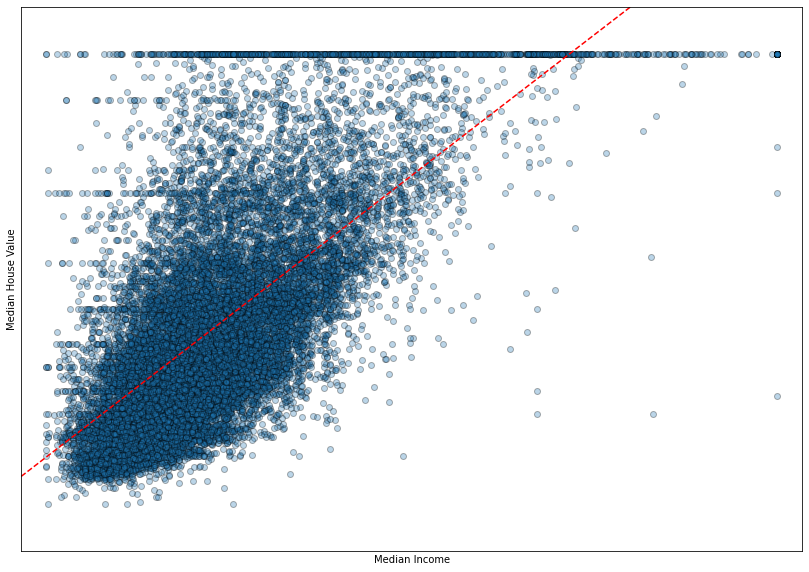

In [ ]:
x_min, x_max = X.iloc[:, 0].min() - 0.5, X.iloc[:, 0].max() + 0.5
y_min, y_max = y.min() - 0.5, y.max() + 0.5

plt.figure(figsize=(14, 10))
plt.clf()

plt.xlabel("Median Income")
plt.ylabel("Median House Value")

# Plot the training points
plt.scatter(X.iloc[:, 0], y, edgecolor="k", alpha=0.3)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
y_line = [theta[0] +  theta[1]*x_min, theta[0] + theta[1] * x_max]
plt.plot([x_min, x_max], y_line, 'r--')
plt.show()

Task 2-2: Regression problem can be solved directly by least square method of numpy ([np.linalg.lstsq](https://numpy.org/doc/stable/reference/generated/numpy.linalg.lstsq.html)). Compare the result (value of theta) by running the method. Your **solver** method should return the exactly same result. You can validate the result using **np.isclose()** method.

In [ ]:
lstsq_rst = None

In [ ]:
np.isclose(lstsq_rst, theta)

array([ True,  True])

In [ ]:
lstsq_rst, theta

(array([0.45085577, 0.41793849]), array([0.45085577, 0.41793849]))

If you would like to practice more on the california housing dataset with complete machine learning steps, please refer to Chapter 2 of the Hands-on coursebook!